<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 4 heads, you win 30 dollars. 
```
```
Otherwise you lose 5 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [1]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/BME 502 Julia_Anaconda/Project.toml`
  No Changes to `~/Documents/BME 502 Julia_Anaconda/Manifest.toml`


In [2]:
function binomial_p(n, k, p)
    # compute nCk = n! / (k!(n-k)!)
    nCk = factorial(n) / (factorial(k) * factorial(n - k))
    return nCk * p^k * (1 - p)^(n - k)
end


binomial_p (generic function with 1 method)

In [3]:
# Using n=10, k=2, p=0.4
# The case here is saying P(X=2) so we have to win EXACTLY 2 of the 10. We do not sum cases after X=1,2.
println("Probability of winning two coin flips: ", binomial_p(10,2,0.4), " % ")

Probability of winning two coin flips: 0.12093235199999998 % 


### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [4]:
#Presuming n = 10 trials, k =4 successes (wins)
# WIN condition: p_win=0.4, P(X>=4. We can win if we win more than 4 heads. 
 # We "should" include cases P(X>4) = P(X=4)+P(X=5)+...P(X=10) - BUT WE ARE NOT in A CDF!

# ONLY DO THE PMF OF P(X=exactly 4)
println("Probability of winning four coin flips: ", binomial_p(10,4,0.4), " % ")

Probability of winning four coin flips: 0.250822656 % 


The chance of losing the bet:

In [5]:
#Presuming n = 10 trials, k =4 successes (wins)
# LOSE condition: 1-[Win Condition]= 1-binomlial_p(10,4,0.4), 


println("Probability of LOSING four coin flips: ", 1-binomial_p(10,4,0.4), " % ")

Probability of LOSING four coin flips: 0.749177344 % 


### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [6]:
# Expected of a Binomial Distribution is mu(x)=n*p, DISCRETE SUMS THE CASES 
# (continuous is an integral)
# We are expecting to either WIN OR LOSE money, both expectations must be seen together to see a net result
prob_4_heads=binomial_p(10,4,0.4)
ev = prob_4_heads * 30 + (1 - prob_4_heads) * (-5)
println("On average you would net earn: \$ ", ev)


On average you would net earn: $ 3.778792959999999


### 1.4

1. What if you need to get exactly 3 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [7]:
# P(X=exactly 3) Discrete Binomial Dist Win Condition
println("Probability of winning three coin flips: ", binomial_p(10,3,0.4), " % ")
println("Probability of losing three coin flips: ", 1-binomial_p(10,3,0.4), " % ")

Probability of winning three coin flips: 0.21499084799999998 % 
Probability of losing three coin flips: 0.785009152 % 


In [8]:
prob_3_heads=binomial_p(10,3,0.4)
ev = prob_3_heads * 30 + (1 - prob_3_heads) * (-5)
println("On average you would net earn: \$ ", ev)

On average you would net earn: $ 2.52467968


# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 4x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [9]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

   Resolving package versions...
  No Changes to `~/Documents/BME 502 Julia_Anaconda/Project.toml`
  No Changes to `~/Documents/BME 502 Julia_Anaconda/Manifest.toml`


In [10]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [11]:
x = 0:1:10
y_true = 4 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [12]:
# Activate current Library to define in Main
using Polynomials
# Fit a 1st-order polynomial (straight line)
p_fit = polyfit(x, y_observed, 1)
fit_coeff = coeffs(p_fit)
println("Fitted polynomial: ", p_fit)
println("Coefficients (constant, x): ", fit_coeff)


LoadError: UndefVarError: `polyfit` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [13]:
# Chi Square Formula: (Observ-Expect)^2) / Expected

function chisqr(b, m, x_observed, y_observed, sigma)
    # Predicted y-values from the "Expected" model y = m*x + b
    y_fit = m .* x_observed .+ b
    
    # Compute the residuals (y_observed - y_fit), normalized by sigma^2
    # Then sum the squares

    # Considering the given equation: (above in markdown format)
    chisq_value = sum((((y_observed .- y_fit).^2 )./ sigma).^2)
    
    return chisq_value
end


chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [14]:
using Random
using Distributions
using Polynomials

#1 Var Defined Globally
sigma = 1.0 # SD
x = 0:1:10 # range and length of norm dist
y_true = 4 .* x .- 2 # Y eqn and true model

#2 Define the chi-square function
function chisqr(b, m, x_data, y_data, sigma)
    # Predicted y from the fitted polynomial: y_fit = b + m*x
    y_fit = b .+ m .* x_data # fitted y
    
    # Sum of (Obs - Exp)^2 / sigma^2
    return sum(((y_data .- y_fit).^2) ./ (sigma^2))
end

#3 Create an empty list to store chi-square values
chisq2_list = Float64[]

#4 Run 10,000 simulations
for i in 1:10000
    # Generate new noisy data each iteration
    noise = rand(Normal(0, sigma), length(x))  # draws from N(0, sigma)
    y_observed = y_true .+ noise
    
    # Fit a 1st-order polynomial (straight line)
    p_fit = polyfit(x, y_observed, 1)
    
    # Extract intercept (b) and slope (m) from the fitted polynomial
    coeff = coeffs(p_fit)  # coeff = [b, m] for degree-1 polynomial
    b_fit, m_fit = coeff[1], coeff[2]
    
    # Calculate chi-square for this fitted model
    chisq_value = chisqr(b_fit, m_fit, x, y_observed, sigma)
    
    # Store result in chisq2_list
    push!(chisq2_list, chisq_value)
end

#5 Print results and descriptive stats
println("List size: ", size(chisq2_list))
println("Mean chi-square: ", mean(chisq2_list))
println("Std chi-square: ", std(chisq2_list))

#Print first few values to inspect
println("First 10 chi-square values: ", chisq2_list[1:10])


LoadError: UndefVarError: `polyfit` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [15]:
# Descriptive Stats
println("Number of chi-square values: ", length(chisq2_list))
println("Mean chi-square: ", mean(chisq2_list))
println("Std of chi-square: ", std(chisq2_list))

Number of chi-square values: 0
Mean chi-square: NaN
Std of chi-square: NaN


* As we have the range of X [0,10], which sets up N=11 points (0 inclusive), and the Chi Square DF = N-2 = 11-2 = 9. We have 9 as the mean, and the SD is 4.27. The Chi Square SD should be √(2*DF) = √18 = 4.24, which is close to the value attained. These values make sense. 

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:40
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

In [16]:
using Distributions
using Plots

#Degrees of freedom from 2.4 data (11 points, 2 params)
dof = 9
chi_dist = Chisq(dof)

# x-range for Prob Density Function
x_dist = 0:0.1:40

# Compute PDF (9 df, 0-40 with 0.1 increments)
pdf_vals = pdf.(chi_dist, x_dist)

# Plot histogram of chisq2_list (normalize = true for area = 1)
histogram(chisq2_list,
    bins = 50,
    normalize = true,
    label = "Simulated Chi-square",
    xlabel = "Chi-square values",
    ylabel = "Density",
    title = "Chi-square Histogram vs Theoretical PDF"
)

# Overlay theoretical PDF with Chi Square  
plot!(x_dist, pdf_vals,
    color = :red,
    linewidth = 2,
    label = "Chi-square PDF (df=$dof)"
)


LoadError: ArgumentError: reducing over an empty collection is not allowed; consider supplying `init` to the reducer

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:8
3. Define b_range = -9:0.01:10
4. Make a contour plot to visualize the distribution of the likelihood


In [17]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

In [18]:
m_range = 1:0.01:8
b_range = -9:0.01:10

# x, y, and sigma (or dataerr) are  data arrays
function chisqr_dist(b, m, x, y; sigma=1.0)
    # Model: f(x) = b + m*x
    # Sum of squared residuals over sigma^2
    return sum( ((y .- (b .+ m .* x)).^2) ./ (sigma.^2) )
end



chisqr_dist (generic function with 1 method)

In [19]:
function p_chi2poly(b, m, x, y; sigma=1.0)
    # Likelihood ~ exp( - chi^2 / 2 )
    return exp( -chisqr_dist(b, m, x, y; sigma=sigma) / 2 )
end


p_chi2poly (generic function with 2 methods)

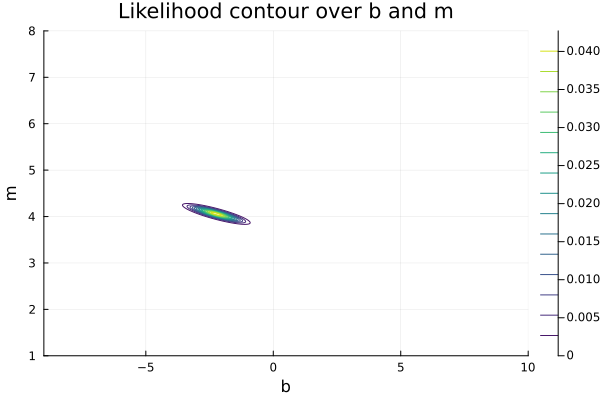

In [20]:
y_observed = y_true .+ noise # From 2.1-2.4

likelihood_vals = [ p_chi2poly(b, m, x, y_observed; sigma=sigma) for b in b_range, m in m_range ]
using Plots

contour(b_range, m_range, likelihood_vals',
    xlabel = "b",
    ylabel = "m",
    title = "Likelihood contour over b and m",
    fill = false,         # do NOT fill the contours
    color = :viridis
)


### 2.7

1. Redefine x = 0:0.5:4 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

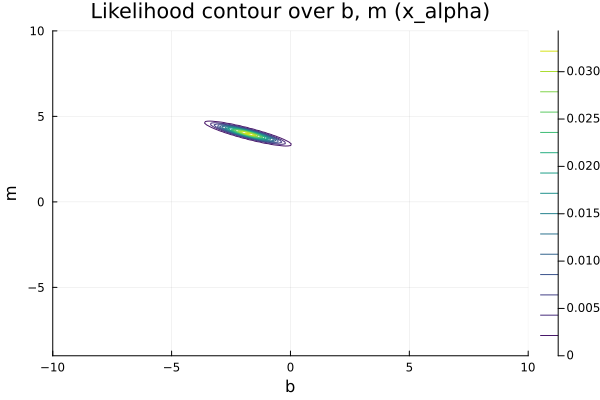

In [21]:
using Distributions, Plots

# 1) Define new x range
x_alpha = 0.5:0.5:4.0
length_x = length(x_alpha)     # number of points

# 2) Generate true model
y_true_alpha = 4 .* x_alpha .- 2   # slope=4, intercept=-2
sigma = 1.0                        # standard deviation of noise
noise_alpha = rand(Normal(0, sigma), length_x)
y_observed_alpha = y_true_alpha .+ noise_alpha

# 3) Define chi-square and likelihood functions
function chisqr_dist(b, m, x, y; sigma=1.0)
    return sum(((y .- (b .+ m .* x)).^2) ./ (sigma.^2))
end

function p_chi2poly(b, m, x, y; sigma=1.0)
    return exp(-chisqr_dist(b, m, x, y; sigma=sigma) / 2)
end

# 4) Build a 2D grid over b, m
b_range = -10.0:0.1:10.0
m_range = -9.0:0.1:10.0

likelihood_vals_alpha = [
    p_chi2poly(b, m, x_alpha, y_observed_alpha; sigma=sigma)
    for b in b_range, m in m_range
]

# 5) Contour plot of the new likelihood
contour(
    b_range, m_range, likelihood_vals_alpha',
    color = :viridis,
    xlabel = "b",
    ylabel = "m",
    fill = false,
    title = "Likelihood contour over b, m (x_alpha)"
)


* The Alpha contour region is similiar to the original contour, as the x domain was changed slightly, from [0,40] to [0,10], which shoudln't affect the plot as much, granted the noise and SD are similar. The alpha regio exist within approx b[-4,0] and m[3,4.5], whereas the original  is b[-1.5,-4.5] and m[-4.25,-3.5] there seems to be a marginal shift downwards and slightly to the left. 

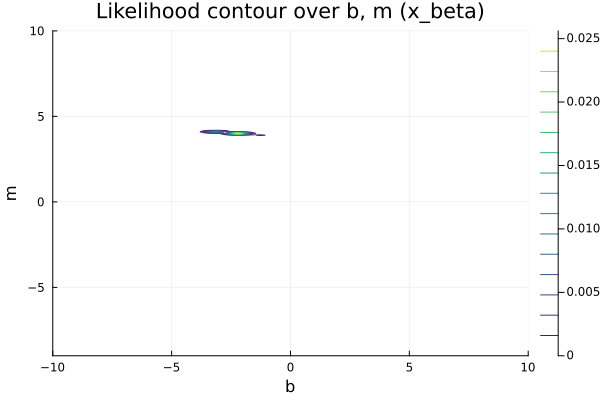

In [22]:
using Distributions, Plots

# 1) Define new x range
x_beta = 0.5:2:20
length_x = length(x_beta)     # number of points

# 2) Generate true model
y_true_beta = 4 .* x_beta .- 2   # slope=4, intercept=-2
sigma = 1.0                        # standard deviation of noise
noise_beta = rand(Normal(0, sigma), length_x)
y_observed_beta = y_true_beta .+ noise_beta

# 3) Define chi-square and likelihood functions
function chisqr_dist(b, m, x, y; sigma=1.0)
    return sum(((y .- (b .+ m .* x)).^2) ./ (sigma.^2))
end

function p_chi2poly(b, m, x, y; sigma=1.0)
    return exp(-chisqr_dist(b, m, x, y; sigma=sigma) / 2)
end

# 4) Build a 2D grid over b, m
b_range = -10.0:0.1:10.0
m_range = -9.0:0.1:10.0

likelihood_vals_beta = [
    p_chi2poly(b, m, x_beta, y_observed_beta; sigma=sigma)
    for b in b_range, m in m_range
]

# 5) Contour plot of the new likelihood
contour(
    b_range, m_range, likelihood_vals_beta',
    color = :viridis,
    xlabel = "b",
    ylabel = "m",
    fill = false,
    title = "Likelihood contour over b, m (x_beta)"
)


* Compared to the original and the alpha, This contour is the most different as the contor is extremely small and exists within a very very region of b[-0.5,-3.5] approx and m[4,4.5], a much smaller region of values. 

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 6 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1.5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

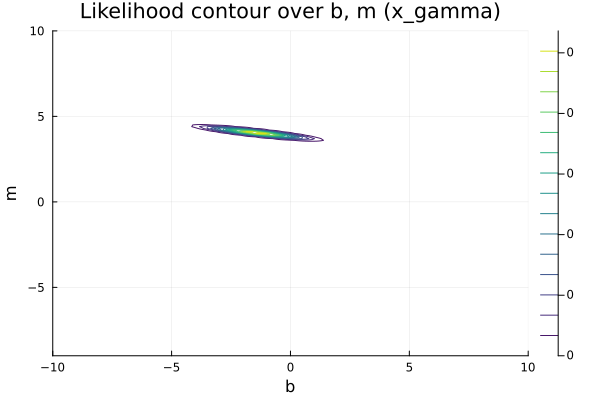

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [29]:
using Distributions, Plots

# 1) Define new x range
x_gamma=0:0.1:10
length_x = length(x_gamma)     # number of points

# 2) Generate true model
y_true_gamma = 4 .* x_gamma .- 2   # slope=4, intercept=-2
sigma = 6                      # standard deviation of noise
noise_gamma = rand(Normal(0, sigma), length_x)
y_observed_gamma = y_true_gamma .+ noise_gamma

# 3) Define chi-square and likelihood functions
function chisqr_dist(b, m, x, y; sigma=6)
    return sum(((y .- (b .+ m .* x)).^2) ./ (sigma.^2))
end

function p_chi2poly(b, m, x, y; sigma=1.0)
    return exp(-chisqr_dist(b, m, x, y; sigma=sigma) / 2)
end

# 4) Build a 2D grid over b, m
b_range = -10.0:0.1:10.0
m_range = -9.0:0.1:10.0

likelihood_vals_gamma = [
    p_chi2poly(b, m, x_gamma, y_observed_gamma; sigma=sigma)
    for b in b_range, m in m_range
]

# 5) Contour plot of the new likelihood
contour(
    b_range, m_range, likelihood_vals_gamma',
    color = :viridis,
    xlabel = "b",
    ylabel = "m",
    fill = false,
    title = "Likelihood contour over b, m (x_gamma)"
)


* The b ranges from [-0.5,4.5] while the m ranges from [3,4], compared to 2.6 this has shifted far more rightward with a larger range of values. This is likely due to the incremental variable within x_gamma as 0 to 10 in increments of 0.1. If this increment is changed the spread (thereby the smaller increments allow for less spread as there is more data to consider and average properly) along with the fixed sigma of 6. 

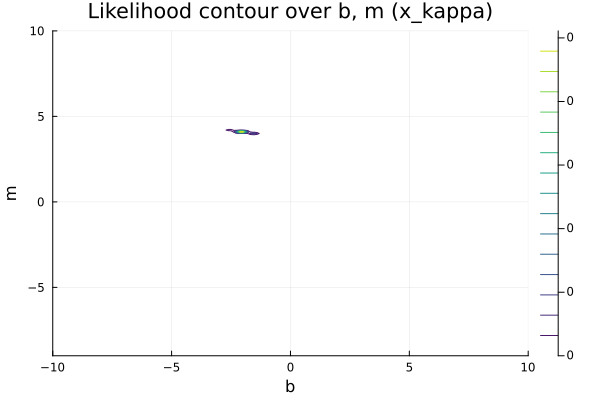

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [31]:
using Distributions, Plots

# 1) Define new x range
x_kappa=0:0.1:10
length_x = length(x_gamma)     # number of points

# 2) Generate true model
y_true_kappa = 4 .* x_kappa .- 2   # slope=4, intercept=-2
sigma = 1.5                      # standard deviation of noise
noise_kappa = rand(Normal(0, sigma), length_x)
y_observed_kappa = y_true_kappa .+ noise_kappa

# 3) Define chi-square and likelihood functions
function chisqr_dist(b, m, x, y; sigma=6)
    return sum(((y .- (b .+ m .* x)).^2) ./ (sigma.^2))
end

function p_chi2poly(b, m, x, y; sigma=1.0)
    return exp(-chisqr_dist(b, m, x, y; sigma=sigma) / 2)
end

# 4) Build a 2D grid over b, m
b_range = -10.0:0.1:10.0
m_range = -9.0:0.1:10.0

likelihood_vals_kappa = [
    p_chi2poly(b, m, x_kappa, y_observed_kappa; sigma=sigma)
    for b in b_range, m in m_range
]

# 5) Contour plot of the new likelihood
contour(
    b_range, m_range, likelihood_vals_kappa',
    color = :viridis,
    xlabel = "b",
    ylabel = "m",
    fill = false,
    title = "Likelihood contour over b, m (x_kappa)"
)


* Now that the sigma is 1.5, with the same range. It seems that since the sigma has shrunk by 4x (from the previous sigma =6), and now the deviation spread has also followed this pattern of spread. Smaller deviation, smaller spread, tighter data points. 